<div style="text-align: right">
<pre>
Name    : Lucas Nelson 
netID   : lln2         
Section : E3           
</pre>
</div>

# FP02: Exploratory Data Analysis

#### Table of Contents
* [01. Introduction](#01.-Introduction)
* [02. Data Wrangling](#02.-Data-Wrangling)
    * [Method to the Madness](#Method-to-the-Madness)
    * [Let the Madness Unfold](#Method-to-the-Madness)
        * [Making a Pretty Data Frame](#Making-a-Pretty-Data-Frame)
        * [Checking for Null Values](#Checking-for-Null-Values)
        * [Two Problems...Two Analyses...Two Data Sets](#Two-Problems...Two-Analyses...Two-Data-Sets)
    * [Summarzing the Madness](#Summarizing-the-Madness)
    * [Saving to Pickle](#Saving-to-Pickle)
* [03a. Label Figure](#03a.-Label-Figure)
* [03b.Feature Figure (not required)](#03b.-Feature-Figure-(not-required))
    * [Quels sont discret?](#Quels-sont-discret?)
    * [Plotting Discrete Variables](#Plotting-Discrete-Variables)
    * [Plotting Continuous Variables](#Plotting-Continuous-Variables)
* [04. Feature Transformations](#04.-Feature-Transformations)
* [05. Feature vs Label Figures](#05.-Feature-vs-Label-Figures)

*********
## 01. Introduction
[TOP](#FP02:-Exploratory-Data-Analysis)

*Is a college degree worth it?* It depends.

*Wouldn't it be cool if you could predict the wage you'd be making after college before applying to college?* It depends...but yes!

For such a genuine question, a plethora of context is required to assess the necessity for a college degree, and even if higher education would be suitable for fulfilling such desires, that does not take into consideration if the degree is worth it. Recent hikes in tuition and other costs that accompany a college degree matched by increasing popularity in Massive Open Online Courses (MOOCs) have presented a not-too-distant reality where colleges face a diminishing supply of degree-seeking students who have fled for the next best option.

Simply put, their underlying motive may be summarized as such: "a college degree isn't worth it." Worth may be defined as "time well spent" or "money well spent", but since "time well spent" is difficult to measure, this analysis will address the latter of worth's two definitions: **can a model predict if a college degree is "money well spent" given a student's collegiate/professional ambitions?**

*********
## 02. Data Wrangling
[TOP](#FP02:-Exploratory-Data-Analysis)

The data I will be using for this project comes from the Integrated Public Use Microdata Series (IPUMS) data library, specifically, `IPUMS Higher Ed`. Data in this library features biennial survey data on the science and engineering workforce in the U.S. from 1993 to 2013 -- gathered by the [National Science Foundation](https://www.nsf.gov/statistics/sestat/#datatables&generate&sestat-landing) -- containing information from basic individual demographics (age, race, gender, birth year) to education background (field of study, type of highest degree) to labor force participation (status, salary, primary position/activity, relatedness to degree).

Although the provided years (1993 to 2013) might seem arbitrary, these years capture three significant events in United States' economic history that greatly effected labor market outcomes:

1. Early 1990s recession
2. Early 2000s recession
3. Great Recession

Having this information could provide insight into how the performance of the United States economy impacts a student's potential earnings upon graduating from college.

### Method to the Madness

Prior to manipulating the data set, there existed $655,241$ observations across $28$ features (bonus: contained no null values). The final data set has been reduced to $535,631$ observations across $20$ features.

Which features were discarded? Which observations were removed?

Of the features discarded, I realized that some columns were either duplicates of other columns (`surid`) or unnecessarily selected (`wktrni`, `wtreasn`). In other words, these columns on their own would not meaningfully contribute to the analysis. Additionally, after removing `NaN`-equivalent values (see below), some columns remained obsolete, including `wrkg` and `lfstat`.

Of the observations removed, I filtered the data set to not include each code-based variable's equivalent `NaN` and `Other` options. This was to remove uncertainty when interpreting the results of a particular prediction. e.g. How is one's wage impacted when their race is `Other`? (Considering the coded races are `White`, `Asian`, and `Minority`, `Other` seemed an unnecessary "complement" to this range.)

### Let the Madness Unfold

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/Users/lucasnelson/Desktop/University of Illinois/Junior/SP21/ECON 490/proj_final/highered_00001.csv'
highed = pd.read_csv(path)

In [3]:
print('SHAPE: {}\nCOLS : {}'.format(highed.shape, highed.columns))

SHAPE: (655241, 28)
COLS : Index(['PERSONID', 'YEAR', 'WEIGHT', 'SAMPLE', 'SURID', 'AGE', 'BIRYR',
       'GENDER', 'RACETH', 'CTZUSIN', 'NBAMED', 'NBAMEMG', 'DGRDG', 'NDGMED',
       'NDGMEMG', 'LFSTAT', 'WRKG', 'OCEDRLP', 'NOCPR', 'NOCPRMG', 'EMSEC',
       'WAPRI', 'WAPRSM', 'SALARY', 'CPI2009C', 'NRREA', 'WKTRNI', 'WTREASN'],
      dtype='object')


##### Making a Pretty Data Frame

Before getting into the nitty gritty, might as well make this data set fun to work with. Let's take care of the column names such that they do not require me to abuse the CAPS LOCK key and following a nomenclature that describes their metric more purposefully.

Speaking of purpose, `surid`, `wktrni`, and `wtreasn` do not fill a purpose in this data set: `surid` is replicated in `sample`; `wktrni` derives no significance for this analysis; `wtreasn` complements `wktrni` and, hence, derives no significance for this analysis.

In [4]:
highed.columns = [x.lower() for x in highed.columns]

highed.rename(columns={'raceth': 'race',
                       'ctzusin': 'usctz',
                       'nbamed': 'bachfld',
                       'nbamemg': 'bachgrp',
                       'ndgmed': 'degfld',
                       'ndgmemg': 'deggrp',
                       'dgrdg': 'highdeg',
                       'nocpr': 'prinjob',
                       'nocprmg': 'pringrp'}, inplace=True)

highed.drop(columns=['surid', 'wktrni', 'wtreasn', 'wrkg', 'lfstat'], inplace=True)

highed.columns

Index(['personid', 'year', 'weight', 'sample', 'age', 'biryr', 'gender',
       'race', 'usctz', 'bachfld', 'bachgrp', 'highdeg', 'degfld', 'deggrp',
       'ocedrlp', 'prinjob', 'pringrp', 'emsec', 'wapri', 'waprsm', 'salary',
       'cpi2009c', 'nrrea'],
      dtype='object')

In [5]:
highed.shape

(655241, 23)

##### Checking for Null Values

Within each column, I would like to check if there exists any null values (there exists no `NaN` from `highed.isnull()` but there exists codes that are `NaN` equivalents), what the unique values are (mainly for code-based features), and how many instances of each unique value there exist (to be abused later).

Important notes from `for loop`:
* There exist multiple instances of select `personid`s - thankfully, their first results are gathered under codes separate from their other tests (see point below).
* `sample`, the code-based feature denoting when an instance's survey was conducted, contains data from the National Survey of College Graduates (NSCG) and National Survey of Recent College Graduates (NSRCG). Data from NSRCG contains unique person identifiers since the survey resamples at each iteration. Data from NSCG, however, contains multiple instances of some individuals and includes subsets of the most recent NSRCG.
* Although NSCG and NSRCG were conducted in 2001, `year` does not include an observation from 2001 due to limitations in the IPUMS Higher Ed data set.
* Individuals who logically skipped `ocedrlp` in the survey also logically skipped `prinjob`, `pringrp`, `emsec`, `wapri`, `waprsm`, and `salary` (less observations to drop than may have seemed). This is because they correspond to entries `highed[highed['wrkg'] == 0]`, i.e. they are not working, and corresponds to the same subset as `highed[highed['lfstat'].isin(2,3)]`.

In [6]:
for column in highed.columns:
    print('={:=<20}'.format(column))
    print('...Checking null...')
    print('No null' if highed[str(column)].isnull().sum() == 0 else 'Null')
    print('...Checking unique values...')
    print(highed[str(column)].unique())
    print('...Checking value counts...')
    print(highed[str(column)].value_counts())
    print('...')

=personid============
...Checking null...
No null
...Checking unique values...
[ 10000000000000007  10000000000000102  10000000000000103 ...
 140101080300000604 140101080300000702 140101080300000800]
...Checking value counts...
30000000002090007     4
10000010007050107     4
30000000109020007     4
10000020105040507     4
50000030701060203     4
                     ..
140101050900040600    1
140101030307060800    1
140101080105020300    1
90304060503020701     1
130009030103000104    1
Name: personid, Length: 320514, dtype: int64
...
=year================
...Checking null...
No null
...Checking unique values...
[1993 1995 1997 1999 2003 2006 2008 2010 2013]
...Checking value counts...
1993    87227
2013    84456
2010    76875
2006    74247
2003    72435
2008    70339
1995    69246
1997    64518
1999    55898
Name: year, dtype: int64
...
=weight==============
...Checking null...
No null
...Checking unique values...
[407.6917  69.2621  52.3937 ... 385.8244  35.7301 478.6435]
...Checking

##### Two Problems...Two Analyses...Two Data Sets

Now that I have found the `NaN` equivalents in columns that have corresponding `NaN` equivalents, I will filter them out.

From here, I will create two data sets: `highed_prepped` and `highed_optional`. The former consists of the data necessary to conduct primary analysis. The latter, however, consists of data (`nrrea`) that gathers whether or not an individual works outside the field corresponding to their degree. Since only a significantly smaller subset of the sample in `highed_prepped` works outside the field corresponding to their degree, these observation will be considered in a separate analysis.

Back to filtering...

Two of the listed conditions do not filter out an `NaN` equivalent; rather, they filter out data that I believe is irrelevant:
* `highed['race'] != 4` : 4 is coded as 'Other', and considering the other options are `White`, `Asian`, and `Minority`, 'Other' seemed an unnecessary complement.
* `highed['nrrea'] != 7` : `nrrea` indicates why someone works outside the field corresponding to their degree (side note, this variable will be held off for optional analyses - most individuals work within the field corresponding to their degree) and 7 is the code corresponding to 'Other'.

After executing this code, the number of observations has been reduced to:
* `highed_prepped`: $535,631$ instances across $20$ covariates
* `highed_optional`: $77,338$ instances across $21$ covariates

In [7]:
highed_age = highed[highed['age'] < 30]

In [8]:
highed_prepped = highed_age[(highed_age['biryr'] != 9999) &
                        (highed_age['race'] != 4) &
                        (highed_age['age'] != 99) &
                        (highed_age['bachfld'] != 999996) &
                        (highed_age['bachgrp'] != 96) &
                        (highed_age['degfld'] != 999999) &
                        (highed_age['deggrp'] != 99) &
                        (highed_age['ocedrlp'] != 98) &
                        (highed_age['prinjob'] != 999998) &
                        (highed_age['pringrp'] != 98) &
                        (highed_age['emsec'] != 98) &
                        (highed_age['wapri'] != 98) &
                        (highed_age['waprsm'] != 98) &
                        (highed_age['salary'] != 9999999)
                        ].drop(columns = 'nrrea'
                              ).set_index(keys = ['year', 'personid']
                                         ).sort_index()
highed_prepped.shape

(109167, 20)

In [31]:
highed_prepped['income2009'] = highed_prepped['salary'] * highed_prepped['cpi2009c']
highed_prepped

weight  sample  age  biryr  gender  race  usctz  \
year personid                                                                
1993 10000000000000108   436.3180     101   28   1965       2     2      1   
     10000000000000204   145.5788     101   28   1965       2     2      1   
     10000000000010204    72.4603     101   28   1965       1     2      1   
     10000000000020707    69.6265     101   28   1965       2     2      1   
     10000000000060403   436.3180     101   28   1965       2     2      1   
...                           ...     ...  ...    ...     ...   ...    ...   
2013 140101080209080001   57.8556    1001   27   1985       1     1      1   
     140101080209080403   28.4980    1001   29   1980       1     2      1   
     140101080209080500   90.0814    1001   28   1985       2     2      1   
     140101080209080706  172.6619    1001   27   1985       2     2      1   
     140101080300000702   35.7301    1001   27   1985       2     2      1   

                         bachfld  bachgrp  highdeg  ...  deggrp  ocedrlp  \
year personid                                       ...                    
1993 10000000000000108    719995        7        1  ...       7        1   
     10000000000000204    799995        7        2  ...       7        1   
     10000000000010204    198895        1        1  ...       1        1   
     10000000000020707    547280        5        1  ...       5        2   
     10000000000060403    799995        7        1  ...       7        3   
...                          ...      ...      ...  ...     ...      ...   
2013 140101080209080001   226395        2        1  ...       2        2   
     140101080209080403   699995        6        1  ...       6        1   
     140101080209080500   537260        5        1  ...       5        1   
     140101080209080706   587995        5        1  ...       5        2   
     140101080300000702   587995        5        1  ...       5        1   

                         prinjob  pringrp  emsec  wapri  waprsm  salary  \
year personid                                                             
1993 10000000000000108    192895        1      4      5       1   30000   
     10000000000000204    505005        5      4      2       1   41000   
     10000000000010204    192895        1      4      2       1   44000   
     10000000000020707    540890        5      4      6       1   38000   
     10000000000060403    505005        5      4     14       5   19000   
...                          ...      ...    ...    ...     ...     ...   
2013 140101080209080001   293995        2      3      2       1   25000   
     140101080209080403   651995        6      4      8       3   60000   
     140101080209080500   530860        5      4      5       1   47000   
     140101080209080706   505005        5      4     12       3   57000   
     140101080300000702   505005        5      4      5       1   52000   

                         cpi2009c  income2009  
year personid                                  
1993 10000000000000108      1.485     44550.0  
     10000000000000204      1.485     60885.0  
     10000000000010204      1.485     65340.0  
     10000000000020707      1.485     56430.0  
     10000000000060403      1.485     28215.0  
...                           ...         ...  
2013 140101080209080001     0.921     23025.0  
     140101080209080403     0.921     55260.0  
     140101080209080500     0.921     43287.0  
     140101080209080706     0.921     52497.0  
     140101080300000702     0.921     47892.0  

[109167 rows x 21 columns]

In [9]:
highed_optional = highed[(highed['biryr'] != 9999) &
                        (highed['race'] != 4) &
                        (highed['age'] != 99) &
                        (highed['bachfld'] != 999996) &
                        (highed['bachgrp'] != 96) &
                        (highed['degfld'] != 999999) &
                        (highed['deggrp'] != 99) &
                        (highed['ocedrlp'] != 98) &
                        (highed['prinjob'] != 999998) &
                        (highed['pringrp'] != 98) &
                        (highed['emsec'] != 98) &
                        (highed['wapri'] != 98) &
                        (highed['waprsm'] != 98) &
                        (highed['salary'] != 9999999) &
                        ((highed['nrrea'] != 98) & (highed['nrrea'] != 7))
                       ].set_index(keys = ['year', 'personid']
                                  ).sort_index()

### Summarizing the Madness

After successfully loading the data in, creating an index with `personid`, and filtering out the non-insightful data, here are the data sets we are left with.

==============================

First, the data set for the main analysis: `highed_prepped`

==============================

In [10]:
highed_prepped.head()

weight  sample  age  biryr  gender  race  usctz  \
year personid                                                               
1993 10000000000000108  436.3180     101   28   1965       2     2      1   
     10000000000000204  145.5788     101   28   1965       2     2      1   
     10000000000010204   72.4603     101   28   1965       1     2      1   
     10000000000020707   69.6265     101   28   1965       2     2      1   
     10000000000060403  436.3180     101   28   1965       2     2      1   

                        bachfld  bachgrp  highdeg  degfld  deggrp  ocedrlp  \
year personid                                                                
1993 10000000000000108   719995        7        1  719995       7        1   
     10000000000000204   799995        7        2  799995       7        1   
     10000000000010204   198895        1        1  198895       1        1   
     10000000000020707   547280        5        1  547280       5        2   
     10000000000060403   799995        7        1  799995       7        3   

                        prinjob  pringrp  emsec  wapri  waprsm  salary  \
year personid                                                            
1993 10000000000000108   192895        1      4      5       1   30000   
     10000000000000204   505005        5      4      2       1   41000   
     10000000000010204   192895        1      4      2       1   44000   
     10000000000020707   540890        5      4      6       1   38000   
     10000000000060403   505005        5      4     14       5   19000   

                        cpi2009c  
year personid                     
1993 10000000000000108     1.485  
     10000000000000204     1.485  
     10000000000010204     1.485  
     10000000000020707     1.485  
     10000000000060403     1.485

In [11]:
highed_prepped.shape

(109167, 20)

In [12]:
highed_prepped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 109167 entries, (1993, 10000000000000108) to (2013, 140101080300000702)
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   weight    109167 non-null  float64
 1   sample    109167 non-null  int64  
 2   age       109167 non-null  int64  
 3   biryr     109167 non-null  int64  
 4   gender    109167 non-null  int64  
 5   race      109167 non-null  int64  
 6   usctz     109167 non-null  int64  
 7   bachfld   109167 non-null  int64  
 8   bachgrp   109167 non-null  int64  
 9   highdeg   109167 non-null  int64  
 10  degfld    109167 non-null  int64  
 11  deggrp    109167 non-null  int64  
 12  ocedrlp   109167 non-null  int64  
 13  prinjob   109167 non-null  int64  
 14  pringrp   109167 non-null  int64  
 15  emsec     109167 non-null  int64  
 16  wapri     109167 non-null  int64  
 17  waprsm    109167 non-null  int64  
 18  salary    109167 non-null  int64  
 19  

In [13]:
highed_prepped.describe()

,weight,sample,age,biryr,gender,race,usctz,bachfld,bachgrp,highdeg,degfld,deggrp,ocedrlp,prinjob,pringrp,emsec,wapri,waprsm,salary,cpi2009c
count,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000,109167.000000
mean,152.943037,616.959512,26.751060,1976.034424,1.528392,2.119331,0.926205,438643.623623,3.825442,1.312796,457821.182363,4.003774,1.645058,583233.262341,5.248885,3.366072,7.570181,2.880339,40474.520688,1.145659
std,282.204283,299.641595,1.831138,6.478401,0.499196,0.602246,0.261439,145544.518696,1.491874,0.593555,156525.934190,1.594430,0.770120,205103.648632,2.022037,0.986794,3.902774,1.482006,23383.809904,0.190817
min,0.381200,101.000000,23.000000,1965.000000,1.000000,1.000000,0.000000,198895.000000,1.000000,1.000000,198895.000000,1.000000,1.000000,182965.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.921000
25%,36.076000,401.000000,25.000000,1970.000000,1.000000,2.000000,1.000000,318730.000000,3.000000,1.000000,338785.000000,3.000000,1.000000,505005.000000,5.000000,3.000000,4.000000,1.000000,24000.000000,0.984000
50%,85.043300,703.000000,27.000000,1975.000000,2.000000,2.000000,1.000000,438995.000000,4.000000,1.000000,449995.000000,4.000000,1.000000,611995.000000,6.000000,4.000000,8.000000,3.000000,37000.000000,1.064000
75%,171.347000,901.000000,28.000000,1980.000000,2.000000,2.000000,1.000000,567350.000000,5.000000,2.000000,567350.000000,5.000000,2.000000,799995.000000,7.000000,4.000000,11.000000,4.000000,54000.000000,1.288000
max,12338.373600,1001.000000,29.000000,1990.000000,2.000000,3.000000,1.000000,799995.000000,7.000000,4.000000,799995.000000,7.000000,3.000000,799995.000000,7.000000,4.000000,14.000000,5.000000,150000.000000,1.485000


==============================

Next, the data set for the optional analysis: `highed_optional`

==============================

In [14]:
highed_optional.head()

weight  sample  age  biryr  gender  race  usctz  \
year personid                                                               
1993 10000000000000608  424.1240     101   43   1950       1     2      1   
     10000000000010205   72.4603     101   33   1960       1     2      1   
     10000000000010209  145.5788     101   38   1955       2     2      1   
     10000000000010406   67.1576     101   33   1960       2     2      1   
     10000000000010701  436.3180     101   48   1945       2     2      1   

                        bachfld  bachgrp  highdeg  ...  deggrp  ocedrlp  \
year personid                                      ...                    
1993 10000000000000608   449995        4        1  ...       4        3   
     10000000000010205   719995        7        1  ...       7        3   
     10000000000010209   226395        2        1  ...       2        3   
     10000000000010406   398895        3        1  ...       3        3   
     10000000000010701   449995        4        1  ...       4        3   

                        prinjob  pringrp  emsec  wapri  waprsm  salary  \
year personid                                                            
1993 10000000000000608   799995        7      4     11       3   31000   
     10000000000010205   192895        1      4      4       4   36000   
     10000000000010209   192895        1      4      4       4   37000   
     10000000000010406   799995        7      4      2       1   29000   
     10000000000010701   799995        7      4     12       3   24000   

                        cpi2009c  nrrea  
year personid                            
1993 10000000000000608     1.485      2  
     10000000000010205     1.485      6  
     10000000000010209     1.485      6  
     10000000000010406     1.485      1  
     10000000000010701     1.485      3  

[5 rows x 21 columns]

In [15]:
highed_optional.shape

(77338, 21)

In [16]:
highed_optional.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77338 entries, (1993, 10000000000000608) to (2013, 140101080300000506)
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   weight    77338 non-null  float64
 1   sample    77338 non-null  int64  
 2   age       77338 non-null  int64  
 3   biryr     77338 non-null  int64  
 4   gender    77338 non-null  int64  
 5   race      77338 non-null  int64  
 6   usctz     77338 non-null  int64  
 7   bachfld   77338 non-null  int64  
 8   bachgrp   77338 non-null  int64  
 9   highdeg   77338 non-null  int64  
 10  degfld    77338 non-null  int64  
 11  deggrp    77338 non-null  int64  
 12  ocedrlp   77338 non-null  int64  
 13  prinjob   77338 non-null  int64  
 14  pringrp   77338 non-null  int64  
 15  emsec     77338 non-null  int64  
 16  wapri     77338 non-null  int64  
 17  waprsm    77338 non-null  int64  
 18  salary    77338 non-null  int64  
 19  cpi2009c  77338 non-nu

In [17]:
highed_optional.describe()

,weight,sample,age,biryr,gender,race,usctz,bachfld,bachgrp,highdeg,...,deggrp,ocedrlp,prinjob,pringrp,emsec,wapri,waprsm,salary,cpi2009c,nrrea
count,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,...,77338.000000,77338.0,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000,77338.000000
mean,316.602663,553.255036,41.382710,1960.121221,1.574090,2.098037,0.954421,460841.441659,4.046846,1.272014,...,4.234969,3.0,664646.441077,5.917246,3.644651,8.387649,3.378611,45758.579224,1.185444,3.352841
std,445.381247,304.710902,12.212881,13.436381,0.494483,0.561174,0.208572,167999.070030,1.641866,0.544948,...,1.744871,0.0,210592.936904,2.105639,0.784533,3.728825,1.152037,32629.579657,0.194064,1.932140
min,0.401500,101.000000,23.000000,1925.000000,1.000000,1.000000,0.000000,198895.000000,1.000000,1.000000,...,1.000000,3.0,182965.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.921000,1.000000
25%,96.490500,301.000000,30.000000,1950.000000,1.000000,2.000000,1.000000,338785.000000,3.000000,1.000000,...,3.000000,3.0,621995.000000,6.000000,4.000000,6.000000,3.000000,22000.000000,0.996000,1.000000
50%,174.246800,601.000000,40.000000,1960.000000,2.000000,2.000000,1.000000,449995.000000,4.000000,1.000000,...,4.000000,3.0,799995.000000,7.000000,4.000000,9.000000,3.000000,39000.000000,1.166000,4.000000
75%,436.318000,801.000000,51.000000,1970.000000,2.000000,2.000000,1.000000,567350.000000,5.000000,1.000000,...,5.000000,3.0,799995.000000,7.000000,4.000000,11.000000,4.000000,61000.000000,1.337000,5.000000
max,13508.485800,1001.000000,75.000000,1990.000000,2.000000,3.000000,1.000000,799995.000000,7.000000,4.000000,...,7.000000,3.0,799995.000000,7.000000,4.000000,14.000000,5.000000,150000.000000,1.485000,6.000000


### Saving to Pickle

In [18]:
# highed_prepped.to_pickle('highed_prepped.pkl')
# highed_optional.to_pickle('highed_optional.pkl')

*********
## 03a. Label Figure
[TOP](#FP02:-Exploratory-Data-Analysis)


A log transformation is not necessary for the `salary` label. The plot is roughly normally distributed without the log transformation.

In [35]:
highed_prepped = highed_prepped[highed_prepped['income2009'] != 0]

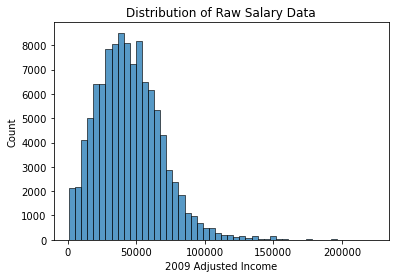

In [53]:
import seaborn as sns

# no_zeroes_list = [highed_prepped['income2009'], np.log(highed_prepped['income2009']), np.sqrt(highed_prepped['income2009']), np.cbrt(highed_prepped['income2009'])]
# for i, df in enumerate(no_zeroes_list):
#     plt.figure(i)
#     sns.histplot(df, bins = 40)
    
ax = sns.histplot(highed_prepped['income2009'], bins=50)
ax.set(xlabel='2009 Adjusted Income', ylabel='Count')
plt.title('Distribution of Raw Salary Data')
plt.show()

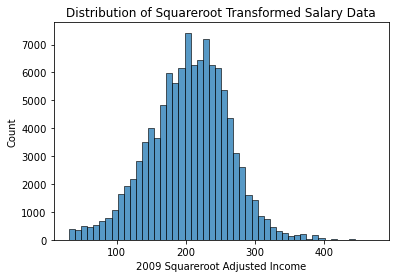

In [56]:
ax = sns.histplot(np.sqrt(highed_prepped['income2009']), bins=50)
ax.set(xlabel='2009 Squareroot Adjusted Income', ylabel='Count')
plt.title('Distribution of Squareroot Transformed Salary Data')
plt.show()

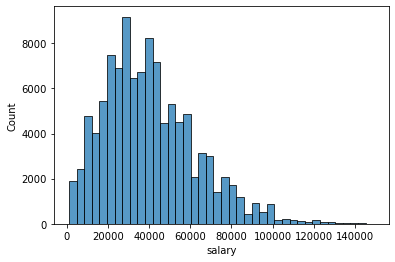

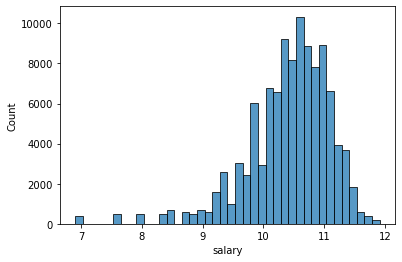

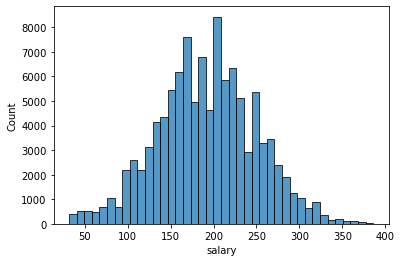

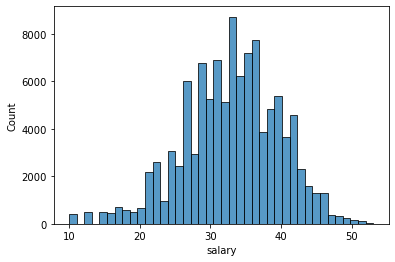

In [37]:
less_150k = highed_prepped[(highed_prepped['salary'] < 150000)]
no_zeroes_list = [less_150k['salary'], np.log(less_150k['salary']), np.sqrt(less_150k['salary']), np.cbrt(less_150k['salary'])]
for i, df in enumerate(no_zeroes_list):
    plt.figure(i)
    sns.histplot(df, bins = 40)

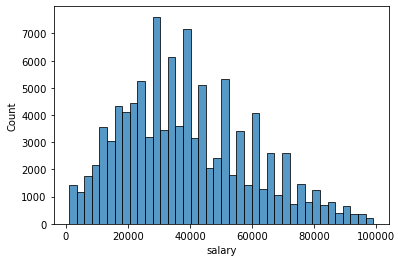

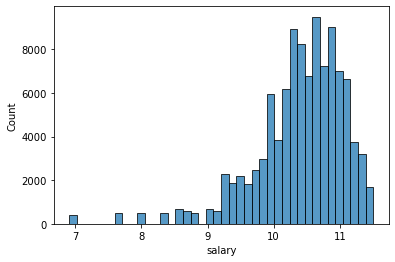

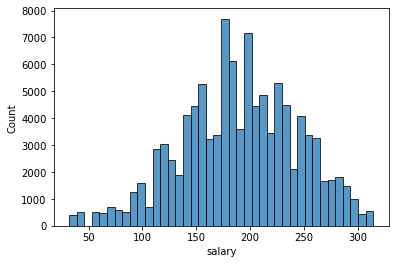

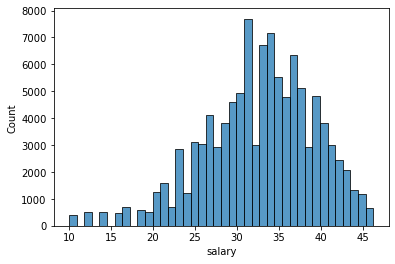

In [38]:
less_100k = highed_prepped[(highed_prepped['salary'] < 100000)]
no_zeroes_list = [less_100k['salary'], np.log(less_100k['salary']), np.sqrt(less_100k['salary']), np.cbrt(less_100k['salary'])]
for i, df in enumerate(no_zeroes_list):
    plt.figure(i)
    sns.histplot(df, bins = 40)

In [41]:
highed_prepped['sqrt_income2009'] = np.sqrt(highed_prepped['income2009'])

<ipython-input-41-4feb06056981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highed_prepped['sqrt_income2009'] = np.sqrt(highed_prepped['income2009'])


In [42]:
highed_prepped

weight  sample  age  biryr  gender  race  usctz  \
year personid                                                                
1993 10000000000000108   436.3180     101   28   1965       2     2      1   
     10000000000000204   145.5788     101   28   1965       2     2      1   
     10000000000010204    72.4603     101   28   1965       1     2      1   
     10000000000020707    69.6265     101   28   1965       2     2      1   
     10000000000060403   436.3180     101   28   1965       2     2      1   
...                           ...     ...  ...    ...     ...   ...    ...   
2013 140101080209080001   57.8556    1001   27   1985       1     1      1   
     140101080209080403   28.4980    1001   29   1980       1     2      1   
     140101080209080500   90.0814    1001   28   1985       2     2      1   
     140101080209080706  172.6619    1001   27   1985       2     2      1   
     140101080300000702   35.7301    1001   27   1985       2     2      1   

                         bachfld  bachgrp  highdeg  ...  ocedrlp  prinjob  \
year personid                                       ...                     
1993 10000000000000108    719995        7        1  ...        1   192895   
     10000000000000204    799995        7        2  ...        1   505005   
     10000000000010204    198895        1        1  ...        1   192895   
     10000000000020707    547280        5        1  ...        2   540890   
     10000000000060403    799995        7        1  ...        3   505005   
...                          ...      ...      ...  ...      ...      ...   
2013 140101080209080001   226395        2        1  ...        2   293995   
     140101080209080403   699995        6        1  ...        1   651995   
     140101080209080500   537260        5        1  ...        1   530860   
     140101080209080706   587995        5        1  ...        2   505005   
     140101080300000702   587995        5        1  ...        1   505005   

                         pringrp  emsec  wapri  waprsm  salary  cpi2009c  \
year personid                                                              
1993 10000000000000108         1      4      5       1   30000     1.485   
     10000000000000204         5      4      2       1   41000     1.485   
     10000000000010204         1      4      2       1   44000     1.485   
     10000000000020707         5      4      6       1   38000     1.485   
     10000000000060403         5      4     14       5   19000     1.485   
...                          ...    ...    ...     ...     ...       ...   
2013 140101080209080001        2      3      2       1   25000     0.921   
     140101080209080403        6      4      8       3   60000     0.921   
     140101080209080500        5      4      5       1   47000     0.921   
     140101080209080706        5      4     12       3   57000     0.921   
     140101080300000702        5      4      5       1   52000     0.921   

                         income2009  sqrt_income2009  
year personid                                         
1993 10000000000000108      44550.0       211.068709  
     10000000000000204      60885.0       246.748860  
     10000000000010204      65340.0       255.616901  
     10000000000020707      56430.0       237.549995  
     10000000000060403      28215.0       167.973212  
...                             ...              ...  
2013 140101080209080001     23025.0       151.739909  
     140101080209080403     55260.0       235.074456  
     140101080209080500     43287.0       208.055281  
     140101080209080706     52497.0       229.122238  
     140101080300000702     47892.0       218.842409  

[108815 rows x 22 columns]

*********
## 03b. Feature Figure (not required)
[TOP](#FP02:-Exploratory-Data-Analysis)
I apologize if this is an inconvenience (skip over if so) but I read the `Label Figure` section as `Feature Figure`. However, I do believe there is information in here that greatly explains my plan in the project and, pending whether you read this or not, advice on how to change my appraoch to the project. Again, sorry for the confusion, but thank you for understanding/helping!

### Quels sont discret?

Creating `for loop` that loops over `continuous` variables and `discrete` variables.

In [21]:
continuous = ['cpi2009c', 'weight'] #`salary` not included, label
discrete = list(set(highed_prepped.columns).difference(set(continuous)))

Set theory don't fail me now...

In [22]:
set(discrete) == set(['sample', 'age', 'biryr', 'gender', 'race', 'usctz', 'bachfld', 'bachgrp',
           'highdeg', 'degfld', 'deggrp', 'ocedrlp', 'prinjob', 'pringrp', 'emsec', 'wapri',
           'waprsm'])

False

Nice. Now to create separate `continuous` and `discrete` sets dependent on the number of classes present in each variable.

In [23]:
discrete_twoClass  = ['gender', 'usctz']
discrete_mltClass  = list(set(discrete).difference(set(discrete_twoClass)))
continuous_csPanel = continuous
continuous_timeSrs = list()

### Plotting Discrete Variables
##### Two Classes

Given the histograms of the discrete (two class) variables, I plan to stick to the following plan:
* `gender`
    * Since gender has had profound impacts on the observed wages of similarly positioned employees whose difference is solely gender, I would be interested in tracking sensitivity over specificity and accuracy. This will allow me to gauge what percentage of individuals are correctly predicted to be females given the sum of correctly predicted females and incorrectly predicted males.
    
* `usctz`
    * Unlike `gender`, it would be more insightful to know if a U.S. citizen is predicted to be a U.S. citizen and a non-U.S. citizen is predict to be a non-U.S. citizen.

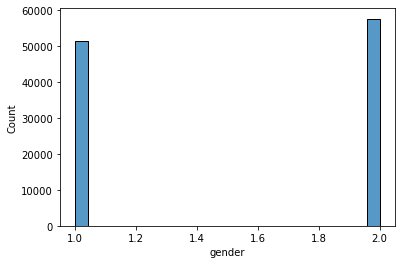

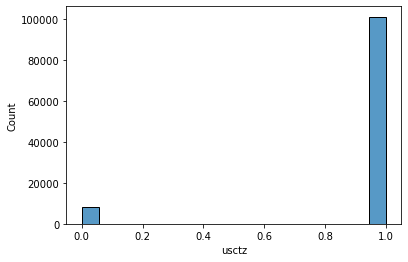

In [24]:
import seaborn as sns

for i, col in enumerate(discrete_twoClass):
    plt.figure(i)
    sns.histplot(highed_prepped[col])

##### Multiple Classes

When observing the outputs, the histogram plots correspond with the initial gameplan I had in mind:

* `bachfld` (and `bachgrp`)
    * In both variables, I don't believe one group is more important to predict accurately than the rest. Assuming that science-related bachelor degree holders wish to pursue science-related jobs, then I might consider predicting the science-related positions/groups more accurately than those that are not science-related.
    
* `wapri` (and `waprsm`)
    * In both variables, I don't believe one group is more important to predict accurately than the rest. However, unlike `bachfld`, none the listed positions are activities unrelated to science and engineering. Hence, no assumptions will be made.
    
* `age`
    * This variable spans ages from 23 up to 75. Since I am concerned with predicting the wage of college graduates, younger ages will be much more important to accurately predict than older ages (unless you're graduating as a senior citizen...maybe then I'd reconsider) to match the premise of this project.
    
* `prinjob` (and `pringrp`)
    * In both variables, I don't believe one group is more important to predict accurately than the rest. None of the listed positions are activities unrelated to science and engineering. Rather, unlike `wapri`, these classes describe the qualifications of the position an individual is in.
    
* `degfld` (and `deggrp`)
    * In both variables, I don't believe one group is more important to predict accurately than the rest. Assuming that science-related professional/graduate degree holders wish to pursue science-related jobs, then I might consider predicting the science-related positions/groups more accurately than those that are not science-related.
    
* `ocedrlp`
    * This variable is interesting. Simply, it measures how related (or not related) one's job is to their highest degree. Similar to `bachfld`, we can assume that everyone pursues a job similar to their degree, in which case 'Closely Related' would need to be predicted most accurately. However, in the `highed_optional` data set (where some individuals do not work in the field related to their degree), accuracy must be stressed on those that answer with 'Not Related'.
    
* `biryr`
    * Similar to `age`, stress the younger than the older. Although at the time of their respective tests someone born in 1955 might be the same age as someone born in 1990, the labor market in 1955 is drastically different than that in 1990. At first thought, accuracy may be stressed from 1980 onwards since that incorporates the Internet Boom, but later analysis/thought may lead me down a different path.
    
* `race`
    * Similar to `biryr`, I might need to give this variable more thought. I will have to determine when the 'Asian' and 'Minority' observations occur not to make transformations but, assuming market discrimination against non-white individuals, explain why their wages are not predicted similarly to observations of race 'White.' (That and there are much fewer observations in those classes.)
    
* `sample`
    * No need to predict one group more accurately than another. Might consider a weight preference (similar to `biryr`) for more recent surveys but only if labor market outcomes are drastically different across the years (1993 to 2013).
    
* `emsec`
    * No need to predict one group more accurately than another. All sectors are reasonably selected.

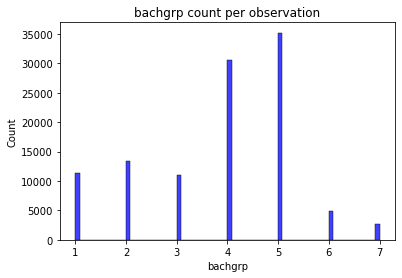

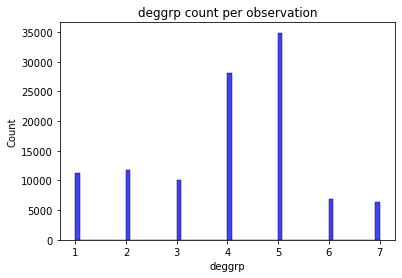

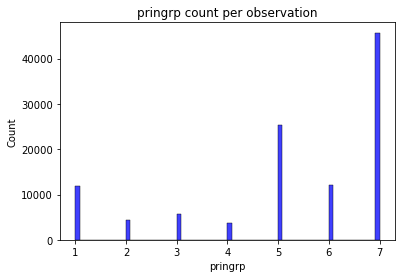

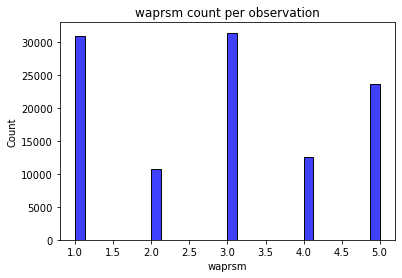

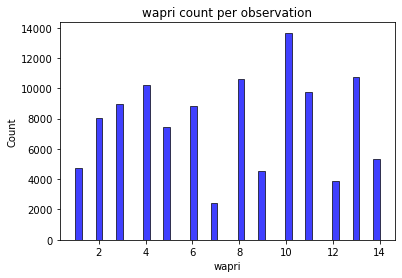

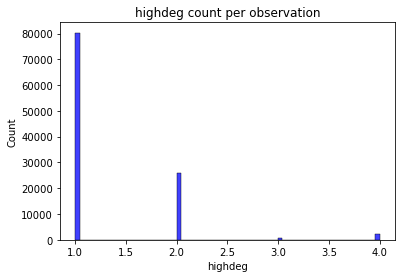

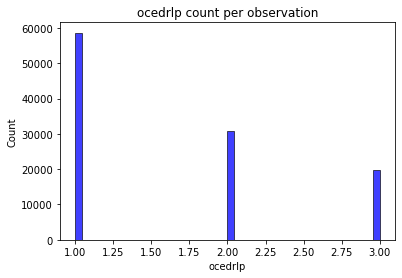

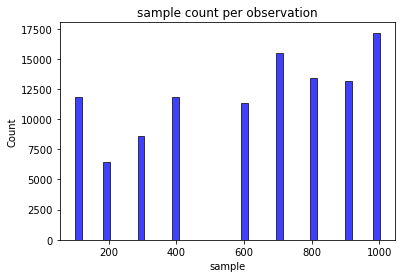

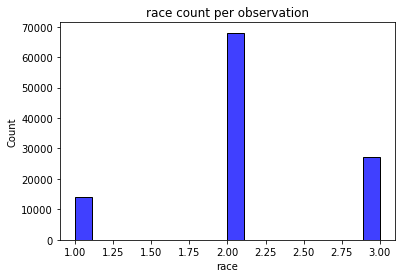

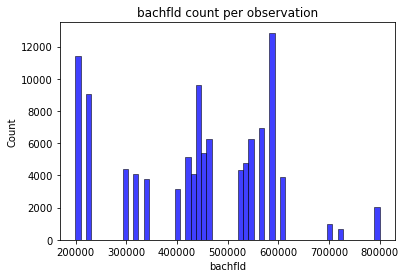

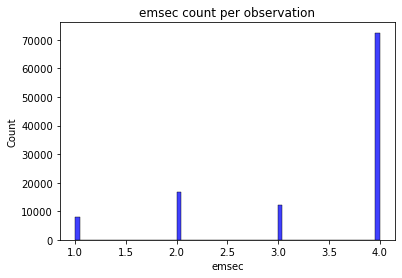

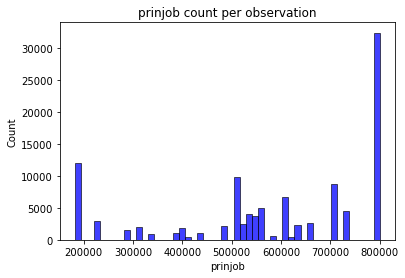

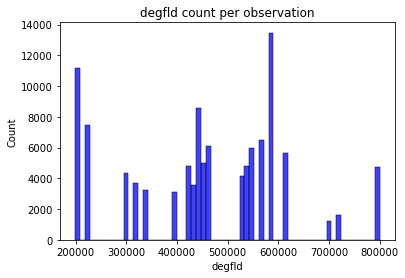

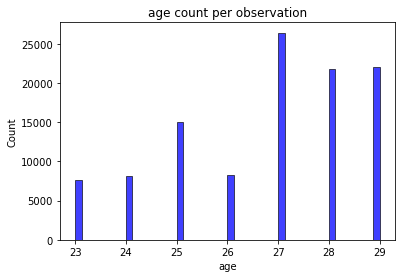

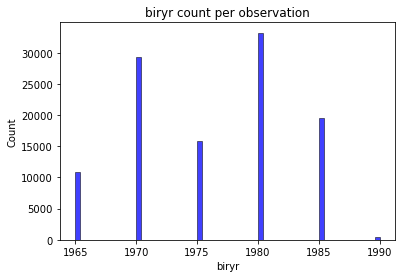

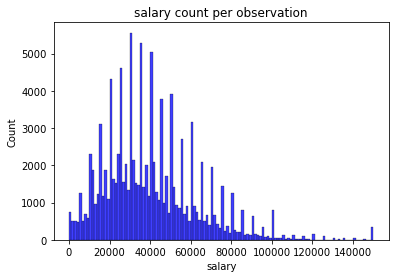

In [25]:
for i, col in enumerate(discrete_mltClass):
    title = str(col) + ' count per observation'
    plt.figure(i)
    sns.histplot(highed_prepped[col], color='blue').set_title(title)

### Plotting Continuous Variables
##### Cross-sectional or Panel

Although the data is not plotting as I'd imagine (mainly `weight`, possibly due to an entry being equal to zero that I somehow missed), neither would need a log transformation (`weight`, `cpi2009c`) because they are descriptive variables.

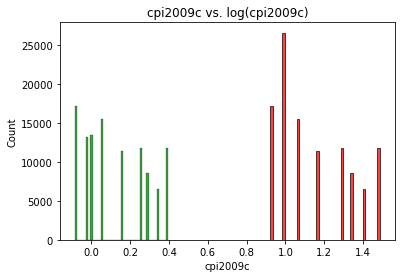

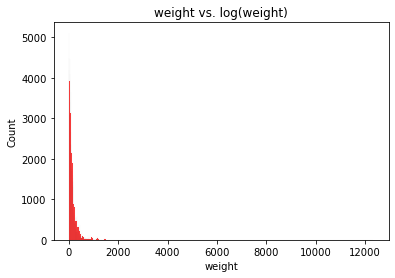

In [26]:
for i, col in enumerate(continuous_csPanel):
    title = str(col) + f' vs. log({col})'
    plt.figure(i)
    sns.histplot(highed_prepped[col], color='red').set_title(title)
    sns.histplot(np.log(highed_prepped[highed_prepped[col] != 0][col]), color='green')

*********
## 04. Feature Transformations
[TOP](#FP02:-Exploratory-Data-Analysis)

None of the listed continuous variables will require a log transformation.

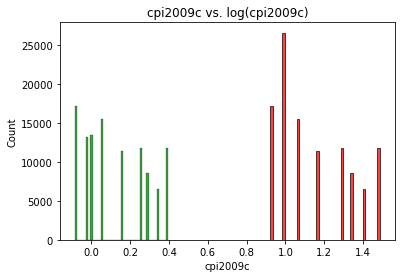

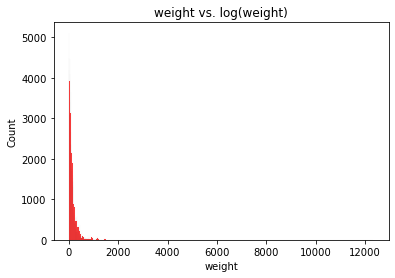

In [27]:
for i, col in enumerate(continuous_csPanel):
    title = str(col) + f' vs. log({col})'
    plt.figure(i)
    sns.histplot(highed_prepped[col], color='red').set_title(title)
    sns.histplot(np.log(highed_prepped[highed_prepped[col] != 0][col]), color='green')

*********
## 05. Feature vs Label Figures
[TOP](#FP02:-Exploratory-Data-Analysis)

Because this data set is massive, I decided to sample 1000 observations to spare my computer. Within this pairplot, I did find some interesting relationships, most notably:
* The variables `weight` and `sample` create a increasingly exponential-like distribution, implying that more unique samples occurred in later (more recent) iterations of these surveys. This could be due to education becoming more available to families that would not have gone to college generations earlier or other reasons that originate from an ill-represented portion of the population.
* Similarly, `biryr` and `weight` create a normal distribution, observing rarer observations occurred between 1940 and 1960. This could be due to veterans obtaining an education they otherwise would not have pursued, and possibly tailoring off as the years extend due to urbanization (i.e. less rare observations).

In [28]:
import seaborn as sns

# sns.pairplot(highed_prepped.sample(1000), hue = 'salary')

Among the genders (1: male, 2: female), men have greater volume at specific points throughout `salary` whereas women are more evenly distributed throughout the `salary` ladder. When it comes to groups of occupations pertaining to relatedness to bachelor's degree, computer science (1), engineering (5), and science and engineering-related fields (6) have the greatest mean salary, whereas life sciences (2), physical sciences (3), and social sciences (4) have a much lower mean salary.

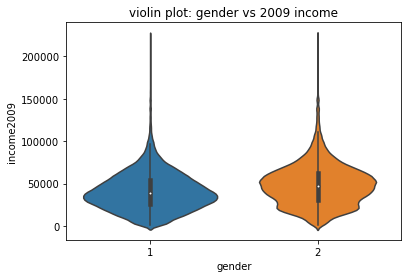

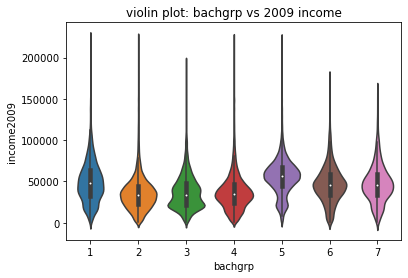

In [44]:
violin_plots = ['gender', 'bachgrp']
for i, col in enumerate(violin_plots):
    title = f'violin plot: {col} vs 2009 income'
    plt.figure(i)
    sns.violinplot(x=highed_prepped[col], y=highed_prepped['income2009']).set_title(title)

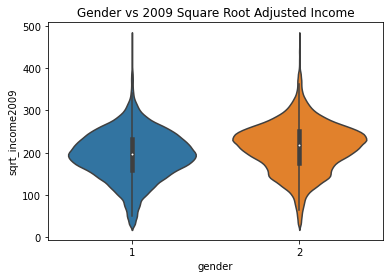

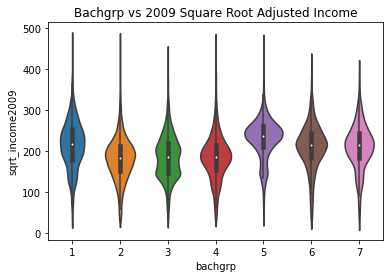

In [61]:
violin_plots = ['gender', 'bachgrp']
for i, col in enumerate(violin_plots):
    title = f'{col.title()} vs 2009 Square Root Adjusted Income'
    plt.figure(i)
    ax = sns.violinplot(x=highed_prepped[col], y=highed_prepped['sqrt_income2009']).set_title(title)

In [60]:
highed_prepped['bachgrp'].value_counts()

5    35160
4    30423
2    13361
1    11374
3    10972
6     4824
7     2701
Name: bachgrp, dtype: int64